In [1]:
import sys

In [2]:
sys.path.append('..')

In [3]:
from galaxyEmulator.config import *
from galaxyEmulator.preprocess import *
from galaxyEmulator.postprocess import *

In [4]:
# read configuration from templates
configuration = Configuration('../Data/config/config_main.ini')

In [5]:
# get configurations
conf = configuration.get_config()

Please edit config_CSST.ini
Conflicts on config are indicated in RED


In [6]:
conf

{'dataDir': '../Data',
 'filePath': '../../TNG-100',
 'workingDir': 'run',
 'simulationMode': 'ExtinctionOnly',
 'includeDust': False,
 'dustEmissionType': 'Equilibrium',
 'dustModel': 'ZubkoDustMix',
 'minWavelength': '0.1',
 'maxWavelength': '1.2',
 'boxLengthScale': '20',
 'maxBoxLength': '300',
 'wavelengthGrid': 'Linear',
 'numWavelengths': '300',
 'minLevel': '6',
 'maxLevel': '10',
 'numPackets': '1e7',
 'SEDFamily': 'BC03',
 'initialMassFunction': 'Chabrier',
 'minStellarMass': '1',
 'maxStellarMass': 'inf',
 'numViews': '3',
 'randomViews': True,
 'inclinations': '0,90,180',
 'azimuths': '0,90,180',
 'FoVboxLengthRatio': '1',
 'postProcessing': True,
 'saveDataCube': True,
 'spatialResol': '100',
 'surveys': 'CSST',
 'displaySED': True,
 'displaySEDxlogscale': True,
 'snapNum': '94',
 'fixedRedshift': '0.06',
 'numThreads': '12',
 'recordComponents': False,
 'ageThreshold': '10',
 'ratioSFR': '10**7',
 'logCompactness': '5',
 'logPressure': '5',
 'coveringFactor': '0.2',
 'tem

In [7]:
# initialize PreProcess class
preprocess = PreProcess(conf)

In [8]:
# get subhalos following conditions indicated in config
preprocess.get_subhalos()

6041 subhalos in snapshot 94 in stellar mass from 1.0 to inf [10^10 M_sun]


In [9]:
# get subhaloIDs
preprocess.get_subhaloIDs()

array([     0,      1,      2, ..., 644966, 646870, 649674])

In [10]:
# run for two subhalos
for id in [649674, 646870]:
    # initialize one subhalo
    preprocess.subhalo(id)
    # create preparation files
    preprocess.prepare()
    # run SKIRT
    preprocess.runSKIRT()
    
    # initialize PostProcessing class
    postprocess = PostProcessing(preprocess.properties, conf)
    # run postprocessing
    postprocess.runPostprocess()

Stellar Mass of Subhalo 649674 is 1.259705901145935 [10^10 M_sun]
Retrieving Stellar and Gas particles.
Star-forming star particles: 0
Quenched star particles: 13399
Creating .ski file.
------estimate memory usage------
numViews: 3
numSpatialPixels: 481
numWavelengthPixels: 300
Estimated memory usage: 1.666 GB
Running SKIRT
29/10/2024 06:03:04.968   Welcome to SKIRT v9.0 (git 382ad4b built on 15/08/2024 at 01:46:45)
29/10/2024 06:03:04.968   Running on 2488h for xczhou
29/10/2024 06:03:04.968   Constructing a simulation from ski file 'skirt.ski'...
29/10/2024 06:03:05.022   Starting simulation skirt using 12 threads and a single process...
29/10/2024 06:03:05.022   Starting setup...
29/10/2024 06:03:05.023     Panchromatic wavelength regime
29/10/2024 06:03:05.023     With transfer medium
29/10/2024 06:03:05.023     Redshift: 0.06
29/10/2024 06:03:05.023     Luminosity distance: 277.531 Mpc
29/10/2024 06:03:05.023     Model and grid symmetry: 3D
29/10/2024 06:03:05.023     Photon life 

In [12]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [14]:
image = fits.open('mock_CSST/Subhalo_646870/galaxy_image.fits')

In [17]:
image[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  502                                                  
NAXIS2  =                  502                                                  
NAXIS3  =                    7                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
SNAPNUM = '94      '           / snapshot ID of IllustrisTNG                    
SURVEY  = 'CSST    '           / Survey                                         
NFILTERS=                    7 / Number of filters                              
UNIT    = 'e       '           / Unit of image array, in electron counts        
INCLI   =   125.629935984666

In [20]:
sed = fits.open('mock_CSST/Subhalo_646870/galaxy_SED.fits')

In [25]:
sed[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    2                                                  
NAXIS2  =                  300                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WUNIT   = 'micron  '           / Units of wavelength                            
FUNIT   = 'Jy      '           / Units of flux in F_nu                          
INCLI   =   125.62993598466676 / Inclination angle, in deg                      
AZIMUTH =    251.3212295146202 / Azimuth angle, in deg                          
REDSHIFT=                 0.06 / Redshift                                       
LUMIDIS =    277.51219262274

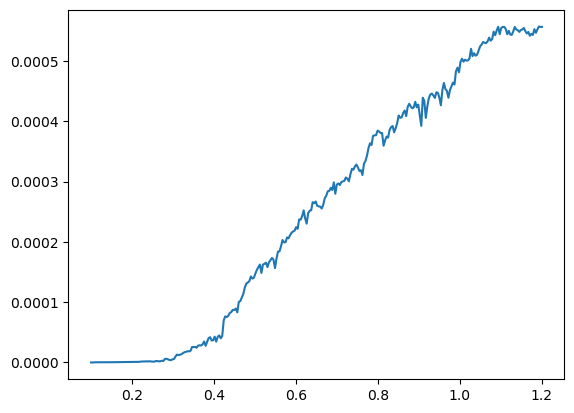

In [26]:
plt.plot(sed[1].data[:, 0], sed[1].data[:, 1])